# Assignment: Unsupervised Machine Learning \ Clustering

In this assignment you will continue the experience you've done with clustering - this time, via hierarchical clustering and DBSCAN.

## Part 1: Hierarchical Clustering
(Practice material by Etam Benger)

In this part we are going to experiment with Hierarchical Clustering, a very powerfull clustering technique that can easily be interperted and explained via the dendrgoram.

The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

### Different ways to calculate the distance between clusters can yield strikingly different results

In [2]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Labels
l = ['A', 'B', 'C', 'D', 'E', 'F']

# Distance matrix
# (Note that it must be symmetrical and its diagonal is always 0)
d = np.array([[0, 1, 3, 3, 3, 4],
              [1, 0, 4, 2, 3, 2],
              [3, 4, 0, 3, 2, 5],
              [3, 2, 3, 0, 2, 4],
              [3, 3, 2, 2, 0, 5],
              [4, 2, 5, 4, 5, 0]])

In [4]:
# The hierarchy.linkage function uses a condensed distance matrix,
# which is a flattened vector of the upper right triangle of the matrix:
# (Caution! If you use the distance matrix as is, you will get erroneous
# results -- in that case the algorithm will assume that each row is a
# vector that represents the respective point, and will calculate the
# euclidean distance between those vectors, which is absolute nonsense.)
squareform(d)

array([1, 3, 3, 3, 4, 4, 2, 3, 2, 3, 2, 5, 2, 4, 5])

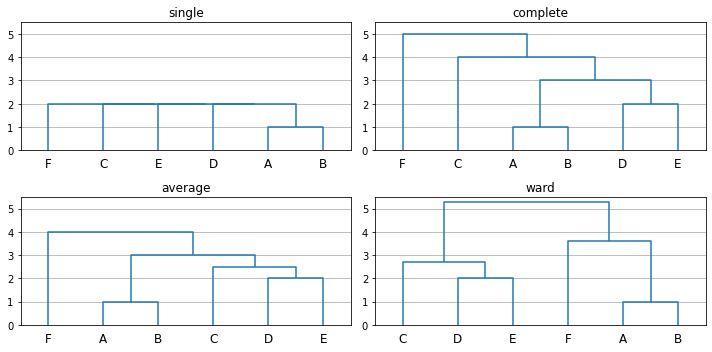

In [5]:
# Please read the documentation here:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#
# As you'll see below, the different methods of linkage may produce very different structures
# and, consequently, very different clusters. Try to understand why (look at the distance matrix
# and follow the formulas in the documentation).
# Sometimes the characteristics of the problem suggest what method is more natural to use than
# the others. This is especially true with respect to the complete (= farthest point) and single
# (= nearest point) methods. Other times the 'correct' method to use is not obvious at all, and
# it requires inspecting the results and the data thoroughly. The average method usually works
# well, however.

methods = ['single', 'complete', 'average', 'ward']  # There are other methods as well, see documentation

plt.figure(figsize=(10, 5))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    plt.title(method)
    
    ############# This is the relevant part: #############
    #                                                    #
    lnk = hierarchy.linkage(squareform(d), method)
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)
    #                                                    #
    ######################################################
    
    plt.ylim(0, 5.5)
    plt.grid(axis='y')

plt.tight_layout()

### Altering the order in which clusters are joined can also yield strikingly different results

In [6]:
# Labels
l = ['A', 'B', 'C', 'D', 'E']

# Distance matrices
epsilon = 10**-16
a, b = 1 + epsilon, 1 - epsilon

d1 = np.array([[0, 1, a, 5, 5],
               [1, 0, 3, 5, 5],
               [a, 3, 0, 3, b],
               [5, 5, 3, 0, 1],
               [5, 5, b, 1, 0]])

d2 = np.array([[0, 1, b, 5, 5],
               [1, 0, 3, 5, 5],
               [b, 3, 0, 3, a],
               [5, 5, 3, 0, 1],
               [5, 5, a, 1, 0]])

In [7]:
# The Frobenius distance between the matrices is negligible
np.sqrt(np.sum((d1-d2)**2))

2.220446049250313e-16

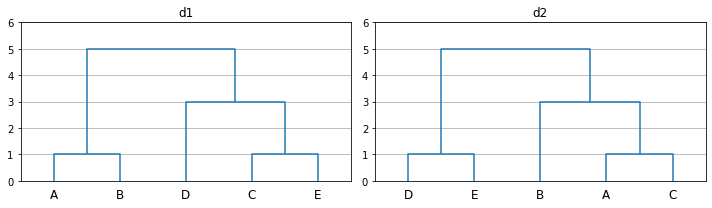

In [8]:
# But the resulting clusters are very different!

plt.figure(figsize=(10, 3))

for i, d in enumerate([d1, d2]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s' % (i+1,))

    lnk = hierarchy.linkage(squareform(d), 'complete') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)

    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()

## Challenge 1.1
Data preparation and preprocessing can help in reducing such "hypersensitivity". One of the techniques is to clean the distance matrix from noise before the actual clustering. This can be done by... clustering. Your tasks:
1. Apply the K-Means algorithm to clean the distance matrix, assuming the correct number of clusters is 4. Clustering can be applied on each matrix independently, although in some cases it's wiser to do a cross-matrix clustering.
2. Create new cleaned versions of the distance matrices (d1_clean and d2_clean).
3. Repeat the above process (previus cell) to plot the results

---
<font color='blue'>**Comment**. The idea of the task was to fit K-Means with 4 clusters and then to substitute the values in the matrices with the values of the closest centroids.The task formulation was a bit confusing, because it wasn't mentioned how the K-Means clustering should be applied to the matrices. There are several possible options:  </font>
---

<font color='blue'> 1) **By elements** (i.e. applying K-Means to a vector, not a matrix): because the matrices, that we consider, are the distance matrices, so all their elements have the same meaning (showing the distance between 2 points) and the same units, the matrices are symmetric (the ranges of values by rows and columns are the same), we can simply flatten the matrices into vectors and cluster the elements of the vector. </font>

In [9]:
# Add your code for Challenge 1.1 after this line, and keep it in this cell.
from sklearn.cluster import KMeans

# Solution #1
km = KMeans(4) 
d1_clusters = km.fit_predict(d1.flatten().reshape(-1, 1)) # convert the distance matrix into a column vector with 25 values, then apply clustering on these 25 scalars
d1_clean = km.cluster_centers_[d1_clusters].reshape(5,5) # for each distance, take the centroid of the cluster this distance is assigned to, and reshape into 5x5 matrix
d2_clusters = km.fit_predict(d2.flatten().reshape(-1, 1))
d2_clean = km.cluster_centers_[d2_clusters].reshape(5,5)
# if the diagonal elements are not equal to zero (in this example, they will be equal to -4.4408921e-16, you can round this value to zero) 
# or use the Solution #2

# Solution #2
# you can firstly concatenate 2 vectors and then cluster:
combined_d = np.concatenate((d1.reshape(d1.size,1), d2.reshape(d2.size,1)), axis=0)
kmeans = KMeans(n_clusters=4).fit(combined_d)
y = kmeans.predict(combined_d)
y_centers = kmeans.cluster_centers_
y_clean = y_centers[y].reshape(combined_d.size)
d1_clean = y_clean[:int(y_clean.size/2)].reshape(d1.shape)
d2_clean = y_clean[int(y_clean.size/2):].reshape(d2.shape)


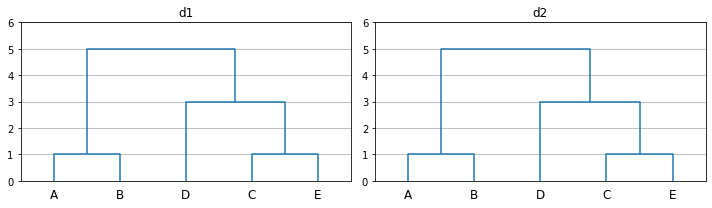

In [10]:
plt.figure(figsize=(10, 3))

for i, d in enumerate([d1_clean, d2_clean]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s' % (i+1,))
    lnk = hierarchy.linkage(squareform(d), 'complete') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)
    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()

In [11]:
# Add your code for Challenge 1.1 after this line, and keep it in this cell.
from sklearn.cluster import KMeans

# Solution #3
# using not a "flatten" vector but a "squareform"
d1_sf = squareform(d1).reshape(-1, 1)
d2_sf = squareform(d2).reshape(-1, 1)
# because we exclude diagonal elements, there will be not 4 clusters, but 3
km = KMeans(3) 
d1_clusters = km.fit_predict(d1_sf)
d1_clean_sf = km.cluster_centers_[d1_clusters]
d1_clean = squareform(d1_clean_sf.reshape(len(d1_sf))) # squareform also works to convert a vector back to a distance matrix

d2_clusters = km.fit_predict(d2_sf)
d2_clean_sf = km.cluster_centers_[d2_clusters]
d2_clean = squareform(d2_clean_sf.reshape(len(d2_sf)))

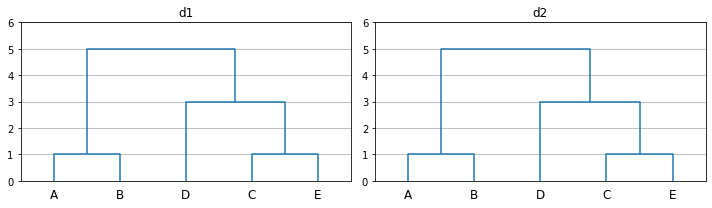

In [12]:
plt.figure(figsize=(10, 3))

for i, d in enumerate([d1_clean, d2_clean]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s' % (i+1,))
    lnk = hierarchy.linkage(squareform(d), 'complete') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)
    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()

<font color='blue'> 2) **Clustering the rows of the matrix**. This is also a possible way to solve the task, but it requires additional transformation of the result (to the symmetric form with "0"-diagonal).</font>

In [13]:
# Solution #4
def make_square(d1):
    d_out = np.zeros(d1.shape)
    for i in range(d1.shape[0]):
        for j in range(d1.shape[1]):
            if i == j:
                pass
            else:
                val = np.mean([d1[i,j],d1[j,i]]) # it's ok to take a mean value
                d_out[i,j]=val
                d_out[j,i]=val
    return d_out
# any other transformation which makes the matrix symmetric with "0"-diagonal is also fine

kmeans_d1 = KMeans(n_clusters=4, random_state=0).fit(d1)
kmeans_d2 = KMeans(n_clusters=4, random_state=0).fit(d2)
d1_clean = np.array(kmeans_d1.cluster_centers_[kmeans_d1.labels_])
d2_clean = np.array(kmeans_d1.cluster_centers_[kmeans_d2.labels_])

d1_clean = make_square(d1_clean)
d2_clean = make_square(d2_clean)

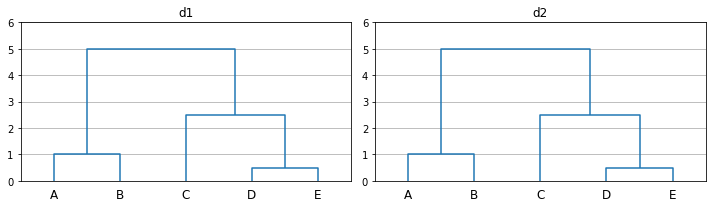

In [14]:
plt.figure(figsize=(10, 3))

for i, d in enumerate([d1_clean, d2_clean]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s' % (i+1,))
    lnk = hierarchy.linkage(squareform(d), 'complete') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)
    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()

---
<font color='blue'> Any (mentioned above) approach to solve the task is accepted as a correct solution. </font>
---
---

### Analyzing voting data

We can also use hierarchical clustering to analyzie election voting data, as we will see in the following exercise

We will use here data from the 18th Kneset elections. https://en.wikipedia.org/wiki/2009_Israeli_legislative_election


In [15]:
df = pd.read_csv('Elections.csv')

# Show first 10 rows
df[:10]
df.shape

(1156, 41)

In [16]:
party_names = list(df.columns)[7:]
print(party_names)

['Avoda', 'Or', 'BaitYehudi', 'YahadutHatora', 'Balad', 'MeimadYarukim', 'Hadash', 'Gimlaim', 'EfraimSne', 'IhudLeumi', 'Israelim', 'Lev', 'NizolimAndAle', 'Kadima', 'IsraelBeytenu', 'Likud', 'Merez', 'Nudelman', 'RuahHadasha', 'Lazuz', 'LojmeiHevra', 'Raam', 'Koah', 'Koah.1', 'Brit', 'Gever', 'Zomet', 'Zabar', 'Daam', 'AleYarok', 'Koah.2', 'Lidar', 'Yarok', 'Shas']


In [17]:
df.head()

,TownNumber,TownName,Potential,TotalVotes,PercentVote,Qualified,Disqualified,Avoda,Or,BaitYehudi,...,Brit,Gever,Zomet,Zabar,Daam,AleYarok,Koah.2,Lidar,Yarok,Shas
0,5000,תל אביב - יפו,383990,226390,58.96,224000,2390,34095,77,3417,...,36,41,42,273,198,1003,50,41,1081,14412
1,3000,ירושלים,353784,217905,61.59,215743,2162,12355,38,8944,...,26,19,23,147,64,434,26,39,445,32624
2,4000,חיפה,235198,136506,58.04,134710,1796,17279,43,3431,...,13,29,67,218,89,485,41,37,467,4117
3,8300,ראשון לציון,182953,117147,64.03,115839,1308,12647,25,2451,...,22,22,24,238,63,454,30,30,580,6784
4,7900,פתח תקווה,155678,100123,64.31,98905,1218,8661,20,6043,...,19,16,21,90,45,330,41,32,341,8061


In [18]:
# Number of cities to cluster (they are ordered by the total number of votes, descending)
n = 100

# Data matrix and labels list (41 columns - metadata ones)
x = np.zeros((n, 34))
labels_r = []

# Iterate over rows in dataframe
for i, row in df[:n].iterrows():
    x[i] = row[7:]                         # take only the votes, not the other meta-data
    labels_r.append(df.TownName[i][::-1])  # reverse the labels (because they are in Hebrew)

# Normalize rows (so they represent proportions):
x = x/(np.sum(x, axis=1).reshape(-1, 1))
x = pd.DataFrame(x,columns=party_names)

In [19]:
# You can experiment with the different methods ('single', 'complete', 'average', 'ward'):
# (Note that we don't use squareform here, so the linkage function will assume by
# default that x is not a distance matrix but a set of observations, and will calculate
# the euclidean distance between them. We could, instead, calculate our own distance
# matrix using other distance measures between distributions, for example the Kullback-
# Leibler divergence (relative entropy).)
lnk = hierarchy.linkage(x, 'average')

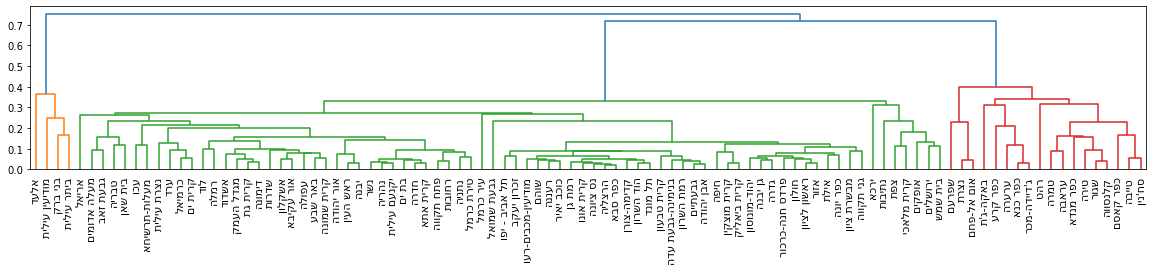

In [20]:
plt.figure(figsize=(20, 3))

# You can experiment with the color threshold to observe the different possible clusterizations:
hierarchy.dendrogram(lnk, labels=labels_r, leaf_font_size=11, color_threshold=0.5);

## Challenge 1.2
When using our domain expertise regarding the population in Israeli cities and villages, we can cleary conclude from the results that our society is mainly splitted according to their "religiosity". Although the jingle says "there's no more right or left", your mission, should you choose to accept it, is to find a way to distinguish between right and left.

The guiding line:
1. We want to cluster parties (for example, left or right winged). Adjust the matrix accordingly.
2. You can change the max number of cities (100 is set now) or the normalization technique.
3. We do not expect to have exact coalition proposed by this technique, however, explain (in a text cell) the gaps between your results and the real agenda proposed by the parties. What exactly could have caused this gaps?

---
<font color='blue'>**Comment**: In this task, there is a lot of possible solutions. You could pre-process the data in different ways (calculate additional features, filter the data, normalize the data, etc.) and the resulting hierarchical clustering will be completely different (and all your solutions are accepted as the correct ones, if you described the dendrogram well). This task was meant to show that in UL the domain knowledge is expecially important and that you should try to achieve the result, corresponding to your expectations as an expert.  </font>
---
---

In [21]:
df['voting_variance']=df.apply(lambda x:np.var(x[7:41]),axis=1)
#the proprtion of votes the most voted party got in each city
df['majority_vote']=df.apply(lambda x:(x[7:41]/x.Qualified).max(),axis=1)

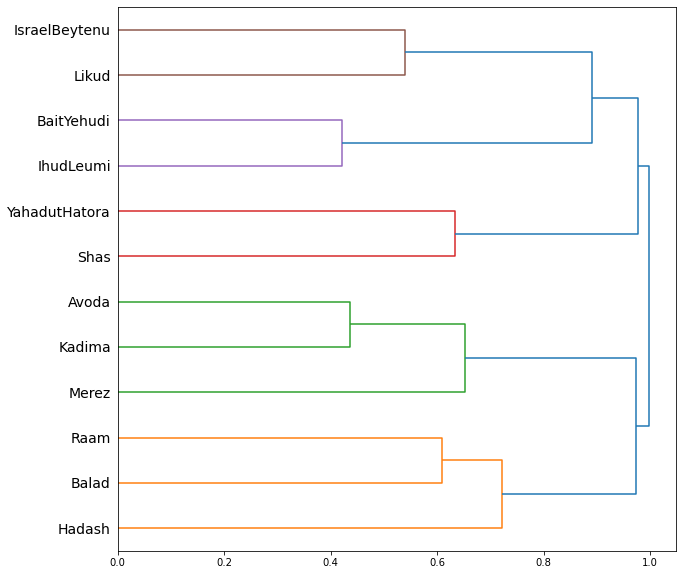

In [22]:
passed_threshold=df.columns[7:41][(df.iloc[:,7:41].sum(axis=0)/df.iloc[:,7:41].sum(axis=0).sum())>=0.02]

party_names = list(passed_threshold)
n =150
party_index=party_names
x = np.zeros((n, len(party_index)))
index=0
for i, row in (df.sort_values(by='majority_vote',ascending=False))[:n].iterrows():
    x[index] = row[party_index]  # take only the votes, not the other meta-data
    index+=1
x = x/(np.sum(x, axis=1).reshape(-1, 1))
# x=(x-np.min(x))/(np.max(x)-np.min(x))
x = pd.DataFrame(x,columns=party_names)
# lnk = hierarchy.linkage(x.T, method='average',metric='cosine',optimal_ordering=True)
lnk = hierarchy.linkage(x.T, method='complete',metric='cosine',optimal_ordering=True)
plt.figure(figsize=(10,10))

hierarchy.dendrogram(lnk, labels=party_names, leaf_font_size=14, color_threshold=0.75,orientation='right',count_sort=True,distance_sort=True,show_leaf_counts=True);

## Part 2 - DBSCAN


In this part of the exercise, we will experiment with the DBSCAN algorithm on a synthetic set of data

In [23]:
# auxilary plotting functions
def plot(X,y=None):# plot
    plt.scatter(X[:, 0], X[:, 1],c=y)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import preprocessing

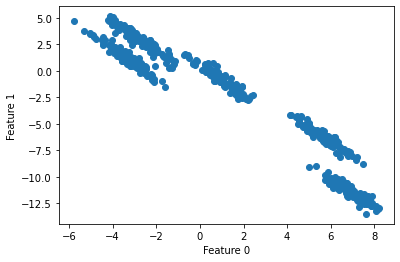

In [24]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=500, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

plot(X)

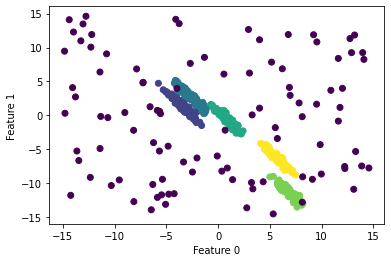

In [25]:
# Adding Noise to data
outliers = 30 * (np.random.RandomState(42).rand(100, 2) ) - 15.0
X = pd.DataFrame(np.concatenate([X, outliers]))
y = pd.DataFrame(np.concatenate([y, [-1]*len(outliers)]))
plot(X.values,y)

### K-Means attempt
Lets see how those outliers and non-spherical shapes affects K-Means clustreing

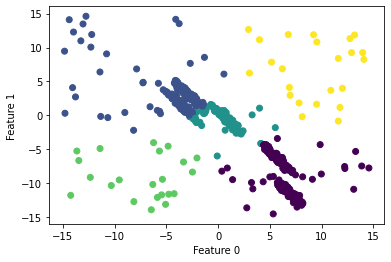

In [26]:
# cluster the data into five clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
kmeans_clusters = kmeans.predict(X)

plot(X.values,kmeans_clusters)

Not surprisingly, K-Means failed to cluster properly the data above 

As we saw in the lecture, DBSCAN can overcome those issues. Yet we still need to determine the parametrs...




# Estimateing $\varepsilon$

## Challenge 2.1

Your co-worker suggested a way to select $\epsilon$ of dbscan.
He wants to go over different eps values and find the one that maximizes the adjusted rand index value. For that, you paid some amount of money and had some guys labled 50 points for you. The indices of the labeled samples you are allowed to use are in the next cell.
Implement the algorithm and find the best $\epsilon$ using this method.
1. Create an array of possible $\epsilon$ values.
2. Iterate over the different values and find the best $\epsilon$ value. What is it?
3. Visualize the results of the best one.



In [27]:
np.random.seed(0)
labeled_samples = np.random.choice(601,50,replace=False)
y.iloc[labeled_samples,0].head()

596   -1
52     1
190    1
165    4
344    4
Name: 0, dtype: int32

---
<font color='blue'>**Comment**: In this task it's important to remember that, while finding the optimal eps, it's recommended to fit the DBSCAN on the whole training set, but to estimate the adjusted rand score (and to optimize eps) only on a "labeled" subset. </font>
---
---

Best experiment: {'eps': 1.287878787878788, 'ari': 0.7801802170145395}


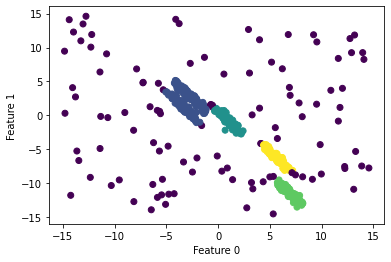

In [28]:
# minPts are given and are not required to be estimated.
# Yet, in the cells after completing the task feel free to play with it and get better result if you can!
minPts = 50

# YOUR CODE HERE - keep results in this cell
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score

epsilons = np.linspace(0.1, 5, 100)

experiments = []

for eps in epsilons:
    dbs = DBSCAN(eps=eps, min_samples=minPts)
    dbs.fit(X)
    
    y_true = y.iloc[labeled_samples, 0]
    y_pred = dbs.labels_[labeled_samples]
    ari = adjusted_rand_score(y_true, y_pred)
    
    experiments.append({
        'eps': eps,
        'ari': ari
    })
    
best_experiment = sorted(experiments, key=lambda x: -x['ari'])[0]
print('Best experiment:', best_experiment)

dbs = DBSCAN(eps=best_experiment['eps'], min_samples=minPts)
dbs.fit(X)
plot(X.values, dbs.labels_)

How many values of $\epsilon$ did you iterate? can you find a way to narrow down the range of the search?

Answers are expected in a textual form

In [29]:
len(epsilons)

100

Since epsilon is in a sense the threshold for distance between 2 points to be considered as neighbors, we can suggest a method that calculates the average distance between each point and its k nearest neighbors (k=minPts), The average k-distances are then plotted in ascending order on a k-distance graph.

The optimal value for epsilon is where the graph has the greatest slope - the place where the change is most pronounced will be our epsilon. So we can narrow down the range of  ϵ s we try to be around this knee.

The following article uses similiar method, but uses specific distance instead of mean: https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf

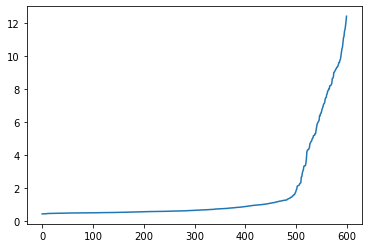

In [30]:
# Using nearest neighburs,
# We are looking for the knee where the epsilon breaks
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=50)
nn_fit = nn.fit(X)
dist, _ = nn_fit.kneighbors(X)

# The mean ditance from the k neighbours, sorted in ascending order
dist = np.sort(dist.mean(axis=1))
plt.plot(dist);

From the last clustering plot we see that two distinct (but very adjuscent) clusters were clustered as one.

Let's try to extend the brute-forcing above to iterate also over min-points in [1, 50] range, picking the highest min-points value which gives the highest ARI score:

Best experiment: {'min_points': 8, 'eps': 0.5454545454545455, 'ari': 0.952353787711815}


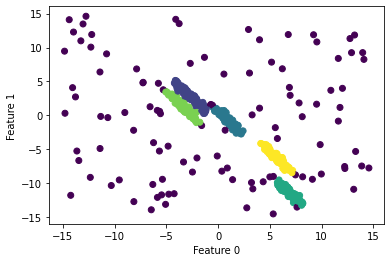

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score

min_points_set = np.arange(1, 51)
epsilons = np.linspace(0.1, 5, 100)

experiments = []

for min_points in min_points_set:
    for eps in epsilons:
        print(f'min-points: {min_points}/{min_points_set.size}, epsilon: {round(eps, 2)}', end='\r', flush=True)
        
        dbs = DBSCAN(eps=eps, min_samples=min_points)
        dbs.fit(X)

        y_true = y.iloc[labeled_samples, 0]
        y_pred = dbs.labels_[labeled_samples]
        ari = adjusted_rand_score(y_true, y_pred)

        experiments.append({
            'min_points': min_points,
            'eps': eps,
            'ari': ari
        })

# descending order-by ARI, min-points (to pick result with higher min_points for same ARI)
best_experiment = sorted(experiments, key=lambda x: (-x['ari'], -x['min_points']))[0]
print('Best experiment:', best_experiment)

dbs = DBSCAN(eps=best_experiment['eps'], min_samples=best_experiment['min_points'])
dbs.fit(X)
plot(X.values, dbs.labels_)

Yay 🎉 

The plot now looks much closer to the real clusters - succesfully splitting the two adjacsent clusters, without creating extra clusters from the noisy points (which can happen with a too low min-points value)

## Challenge 2.2


Support yout findings by plotting the Purity score.
Implement the purity score and print the score for the best epsilon you have found.
Print the results for:
1. The small labeled set you were given
2. The rest of the data (not including the set from 1)
3. The whole data together

Are we overfitting?

---
<font color='blue'>**Comment**: In this task, if the purity scores are not too different on different subsets, then we can assume that the model is not overfitted.</font>
---
---

In [32]:
# Purity calculation here
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)

    return np.sum(np.amax(contingency_matrix, axis=0)) / y_true.size 

def print_purity(min_points, epsilon):
    print(f'Purity scores for min-points: {min_points}, epsilon: {epsilon:.3f}')

    dbs = DBSCAN(eps=epsilon, min_samples=min_points)
    dbs.fit(X)

    y_true = y.iloc[labeled_samples, 0]
    y_pred = dbs.labels_[labeled_samples]
    print(f'\tPurity score for labeled set: {purity_score(y_true, y_pred):.3f}')

    X_indexes = np.arange(0, X.shape[0])
    rest_of_data_idx = np.setdiff1d(X_indexes, labeled_samples)
    y_true = y.iloc[rest_of_data_idx,0]
    y_pred = dbs.labels_[rest_of_data_idx]
    print(f'\tPurity score for all excluding labeled set: {purity_score(y_true, y_pred):.3f}')

    y_true = y.iloc[X_indexes, 0]
    y_pred = dbs.labels_[X_indexes]
    print(f'\tPurity score whole data:, {purity_score(y_true, y_pred):.3f}')
    

experiments_50_min_points = [e for e in experiments if e['min_points']==50]
best_experiment_50_min_points = sorted(experiments_50_min_points, key=lambda x: -x['ari'])[0]
print_purity(50, best_experiment_50_min_points['eps'])

print('')
print_purity(best_experiment['min_points'], best_experiment['eps'])

Purity scores for min-points: 50, epsilon: 1.288
	Purity score for labeled set: 0.820
	Purity score for all excluding labeled set: 0.811
	Purity score whole data:, 0.812

Purity scores for min-points: 8, epsilon: 0.545
	Purity score for labeled set: 0.980
	Purity score for all excluding labeled set: 0.980
	Purity score whole data:, 0.980


We can see that the purity results for the small labeled set and for the rest of the data are similiar. Hence,
it doesn't look like we are overfitting.




# Good Luck and Enjoy Learning Machine Learning!

